In [0]:
%sh
rm    /tmp/clinicaltrial_2023.zip
rm    /tmp/clinicaltrial_2021.zip
rm    /tmp/clinicaltrial_2020.zip
rm    /tmp/pharma.zip 

rm: cannot remove ' /tmp/pharma.zip': No such file or directory


In [0]:
# dbutils.fs.rm("FileStore/tables/clinicaltrial_2023", True)
# dbutils.fs.rm("FileStore/tables/clinicaltrial_2021", True)
# dbutils.fs.rm("FileStore/tables/clinicaltrial_2020", True)
# dbutils.fs.rm("FileStore/tables/pharma", True)

In [0]:
# Use this command to check the files are uploaded 

dbutils.fs.ls("/FileStore/tables/")

[FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1709127125000),
 FileInfo(path='dbfs:/FileStore/tables/account-models/', name='account-models/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts/', name='accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations/', name='activations/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations.zip', name='activations.zip', size=8411369, modificationTime=1706706651000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020/', name='clinicaltrial_2020/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020-1.zip', name='clinicaltrial_2020-1.zip', size=10599182, modificationTime=1709545849000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020-2.zip', name='clinicaltrial_2020-2.zip', size=10599182, modificationTime=170989271500

In [0]:
# Use this command to copy the files to Local file system 

dbutils.fs.cp("/FileStore/tables/clinicaltrial_2020.zip", "file:/tmp/")
dbutils.fs.cp("/FileStore/tables/clinicaltrial_2021.zip", "file:/tmp/")
dbutils.fs.cp("/FileStore/tables/clinicaltrial_2023.zip", "file:/tmp/")

dbutils.fs.cp("/FileStore/tables/pharma.zip", "file:/tmp/")

True

In [0]:
%sh

# use Unix command to to varify that all files are copied to tmp diectory

ls /tmp/

Rserv
RtmpAjjzFN
chauffeur-daemon-params
chauffeur-daemon.pid
chauffeur-env.sh
clinicaltrial_2020.zip
clinicaltrial_2021.zip
clinicaltrial_2023.zip
custom-spark.conf
driver-daemon-params
driver-daemon.pid
driver-env.sh
hsperfdata_root
pharma.zip
python_lsp_logs
systemd-private-2de7799d1fe146fba14f87188755cdfe-systemd-logind.service-2P6C7t
systemd-private-2de7799d1fe146fba14f87188755cdfe-systemd-resolved.service-KzIJYh
tmp.L52FEIk8qE


In [0]:
%sh

# Use Unix command to unzip all files

unzip -d /tmp/ /tmp/clinicaltrial_2020.zip
unzip -d /tmp/ /tmp/clinicaltrial_2021.zip
unzip -d /tmp/ /tmp/clinicaltrial_2023.zip

unzip -d /tmp/ /tmp/pharma.zip

Archive:  /tmp/clinicaltrial_2020.zip
  inflating: /tmp/clinicaltrial_2020.csv  
Archive:  /tmp/clinicaltrial_2021.zip
  inflating: /tmp/clinicaltrial_2021.csv  
Archive:  /tmp/clinicaltrial_2023.zip
  inflating: /tmp/clinicaltrial_2023.csv  
Archive:  /tmp/pharma.zip
  inflating: /tmp/pharma.csv         


In [0]:
# use this command to create DBFS dirctory in file store directory for all files to move back to DBFS

dbutils.fs.mkdirs("FileStore/tables/clinicaltrial_2020")
dbutils.fs.mkdirs("FileStore/tables/clinicaltrial_2021")
dbutils.fs.mkdirs("FileStore/tables/clinicaltrial_2023")

dbutils.fs.mkdirs("FileStore/tables/pharma")

True

In [0]:
# use command to move extracted csv file back to DBFS from tmp directory to fileStore/table directory

dbutils.fs.mv("file:/tmp/clinicaltrial_2020.csv", "FileStore/tables/clinicaltrial_2020.csv", True)
dbutils.fs.mv("file:/tmp/clinicaltrial_2021.csv", "FileStore/tables/clinicaltrial_2021.csv", True)
dbutils.fs.mv("file:/tmp/clinicaltrial_2023.csv", "FileStore/tables/clinicaltrial_2023.csv", True)

dbutils.fs.mv("file:/tmp/pharma.csv", "FileStore/tables/pharma.csv", True)

True

In [0]:
# use command to check the files are successfully moved to FileStore/tables directory

dbutils.fs.ls("FileStore/tables/clinicaltrial_2023.csv")


[FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2023.csv', name='clinicaltrial_2023.csv', size=292436366, modificationTime=1713581695000)]

In [0]:
dbutils.fs.ls("FileStore/tables/clinicaltrial_2021.csv")


[FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2021.csv', name='clinicaltrial_2021.csv', size=50359696, modificationTime=1713581679000)]

In [0]:
dbutils.fs.ls("FileStore/tables/clinicaltrial_2020.csv")

[FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020.csv', name='clinicaltrial_2020.csv', size=46318151, modificationTime=1713581676000)]

In [0]:
# use command to check the files are successfully moved to FileStore/tables directory

dbutils.fs.ls("FileStore/tables/pharma.csv")

[FileInfo(path='dbfs:/FileStore/tables/pharma.csv', name='pharma.csv', size=678999, modificationTime=1713581697000)]

In [0]:
# load datasets in dataframe for cleaning 

clinicaltrial_2023_df = spark.read.csv("/FileStore/tables/clinicaltrial_2023.csv", header=True, inferSchema=True)
clinicaltrial_2021_df = spark.read.csv("/FileStore/tables/clinicaltrial_2021.csv", header=True, inferSchema=True)
clinicaltrial_2020_df = spark.read.csv("/FileStore/tables/clinicaltrial_2020.csv", header=True, inferSchema=True)

pharma_df = spark.read.csv("/FileStore/tables/pharma.csv", header="true", inferSchema=True)

In [0]:
clinicaltrial_2023_df.printSchema()

root
 |-- Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- _c16: string (nullable = true)
 |-- _c17: string (nullable = true)
 |-- _c18: string (nullable = true)
 |-- _c19: string (nullable = true)
 |-- _c20: string (nullable = true)
 |-- _c21: string (nullable = true)
 |-- _c22: string (nullable = true)
 |-- _c23: string (nullable = tru

In [0]:
from pyspark.sql.functions import split, to_date, col

# Splitting columns with headers
clinicaltrial_2023_df = clinicaltrial_2023_df.withColumn("Id", split(col("Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion"), '\t'))

In [0]:
clinicaltrial_2023_df = clinicaltrial_2023_df.select(
    clinicaltrial_2023_df.Id[0].alias("Id"),
    clinicaltrial_2023_df.Id[1].alias("Study Title"),
    clinicaltrial_2023_df.Id[2].alias("Acronym"),
    clinicaltrial_2023_df.Id[3].alias("Status"),
    clinicaltrial_2023_df.Id[4].alias("Conditions"),
    clinicaltrial_2023_df.Id[5].alias("Interventions"),
    clinicaltrial_2023_df.Id[6].alias("Sponsor"),
    clinicaltrial_2023_df.Id[7].alias("Collaborators"),
    clinicaltrial_2023_df.Id[8].alias("Enrollment"),
    clinicaltrial_2023_df.Id[9].alias("Funder Type"),
    clinicaltrial_2023_df.Id[10].alias("Type"),
    clinicaltrial_2023_df.Id[11].alias("Study Design"),
    clinicaltrial_2023_df.Id[12].alias("Start"),
    clinicaltrial_2023_df.Id[13].alias("Completion")
)

In [0]:
clinicaltrial_2023_df.printSchema()

root
 |-- Id: string (nullable = true)
 |-- Study Title: string (nullable = true)
 |-- Acronym: string (nullable = true)
 |-- Status: string (nullable = true)
 |-- Conditions: string (nullable = true)
 |-- Interventions: string (nullable = true)
 |-- Sponsor: string (nullable = true)
 |-- Collaborators: string (nullable = true)
 |-- Enrollment: string (nullable = true)
 |-- Funder Type: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Study Design: string (nullable = true)
 |-- Start: string (nullable = true)
 |-- Completion: string (nullable = true)



In [0]:
# view the first five records of the  dataframe
clinicaltrial_2023_df.show(5)


+-----------+--------------------+---------+----------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------------+--------------------+----------+----------+
|         Id|         Study Title|  Acronym|    Status|          Conditions|       Interventions|             Sponsor|       Collaborators|Enrollment|Funder Type|          Type|        Study Design|     Start|Completion|
+-----------+--------------------+---------+----------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------------+--------------------+----------+----------+
|NCT03630471|Effectiveness of ...|    PRIDE| COMPLETED|Mental Health Iss...|                NULL|                NULL|                NULL|      NULL|       NULL|          NULL|                NULL|      NULL|      NULL|
|NCT05992571|Oral Ketone Monoe...|         |RECRUITING|Cerebrovascular F...|OTHER: Placebo|DI...| McMaster Universit

In [0]:
from pyspark.sql.functions import col

null_empty_type_count = clinicaltrial_2023_df.filter((col("Type").isNull()) | (col("Type") == "")).count()

null_empty_conditions_count = clinicaltrial_2023_df.filter((col("Conditions").isNull()) | (col("Conditions") == "")).count()

print("Number of null or empty columns in Type column:", null_empty_type_count)
print("Number of null or empty columns in Conditions column:", null_empty_conditions_count)

Number of null or empty columns in Type column: 180380
Number of null or empty columns in Conditions column: 40976


In [0]:
from pyspark.sql.functions import col

null_empty_completion_count = clinicaltrial_2023_df.filter((col("Completion").isNull()) | (col("Completion") == "")).count()

print("Number of null or empty columns in Completion column:", null_empty_completion_count)

Number of null or empty columns in Completion column: 253090


In [0]:
from pyspark.sql.functions import when, col

def calculate_median(df, column):

    filtered_df = df.filter((col(column).isNotNull()) & (col(column) != ""))

    sorted_df = filtered_df.select(column).orderBy(column)
    count = sorted_df.count()
    median_index = count // 2

    if count % 2 == 0:
        median_value = sorted_df.collect()[median_index][0]
    else:
        median_value = sorted_df.collect()[median_index][0]

    return median_value
    
type_median = calculate_median(clinicaltrial_2023_df,"Type")

conditions_median = calculate_median(clinicaltrial_2023_df,"Conditions")

clinicaltrial_2023_df = clinicaltrial_2023_df.withColumn("Type",
                                                         when((col("Type").isNull()) | (col("Type") == "" ), type_median)
                                                        .otherwise(col("Type")))

clinicaltrial_2023_df = clinicaltrial_2023_df.withColumn("Conditions",
                                                         when((col("Conditions").isNull()) | (col("Conditions") == "" ), conditions_median)
                                                        .otherwise(col("Conditions")))

In [0]:
clinicaltrial_2023_df.show()

+-----------+--------------------+---------+----------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------------+--------------------+----------+----------+
|         Id|         Study Title|  Acronym|    Status|          Conditions|       Interventions|             Sponsor|       Collaborators|Enrollment|Funder Type|          Type|        Study Design|     Start|Completion|
+-----------+--------------------+---------+----------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------------+--------------------+----------+----------+
|NCT03630471|Effectiveness of ...|    PRIDE| COMPLETED|Mental Health Iss...|                NULL|                NULL|                NULL|      NULL|       NULL|INTERVENTIONAL|                NULL|      NULL|      NULL|
|NCT05992571|Oral Ketone Monoe...|         |RECRUITING|Cerebrovascular F...|OTHER: Placebo|DI...| McMaster Universit

#   Implimentation of DataFrame


#### Question No 1 

In [0]:
# calculates the number of distinct studies
num_studies_df = clinicaltrial_2023_df.select("Study Title").distinct().count()

# prints the total number of distinct studies in the clinicaltrial_2023_df
print("Total Number of distinct studies::",num_studies_df)

Total Number of distinct studies:: 469788


#### Question No 2

In [0]:
from pyspark.sql.functions import desc

# Group the DataFrame by the 'Type' column and count the occurrences of each type Order the resulting DataFrame by the 'count' column in descending order
type_counts_df = clinicaltrial_2023_df.groupBy('Type').count().orderBy(desc('count'))

# Show the ordered DataFrame with type counts
type_counts_df.show()

+---------------+------+
|           Type| count|
+---------------+------+
| INTERVENTIONAL|411364|
|  OBSERVATIONAL| 71499|
|EXPANDED_ACCESS|   559|
+---------------+------+



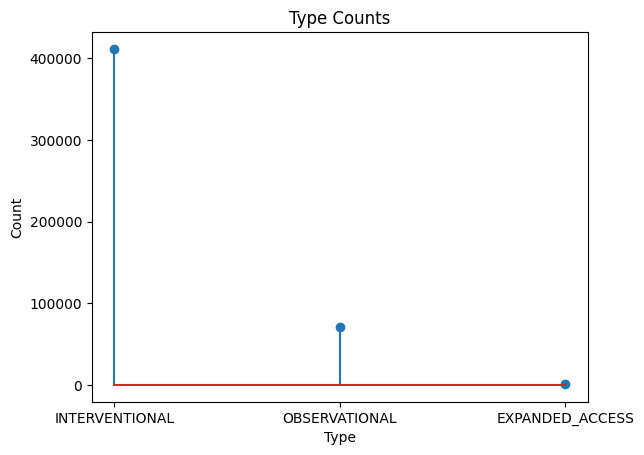

In [0]:
import pyspark.pandas as ps
import matplotlib.pyplot as plt

type_counts_pd = type_counts_df.toPandas()


plt.stem(type_counts_pd['Type'], type_counts_pd['count'])
plt.title('Type Counts')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

#### Question No 3

In [0]:
# Group the DataFrame by the 'Conditions' column
# Count the number of rows in each group (i.e., the frequency of each condition)
# Order the resulting DataFrame by the 'count' column in descending order
# Limit the output to the first 5 rows (i.e., the top 5 most frequent conditions)
top_5_conditions_df = clinicaltrial_2023_df.groupBy('Conditions').count().orderBy("count",ascending=False).limit(5)

# Show the resulting DataFrame
top_5_conditions_df.show()

+------------------+-----+
|        Conditions|count|
+------------------+-----+
|Hypotension|Sepsis|40978|
|           Healthy| 6665|
|     Breast Cancer| 4138|
| Diabetes Mellitus| 3333|
|              Pain| 2562|
+------------------+-----+



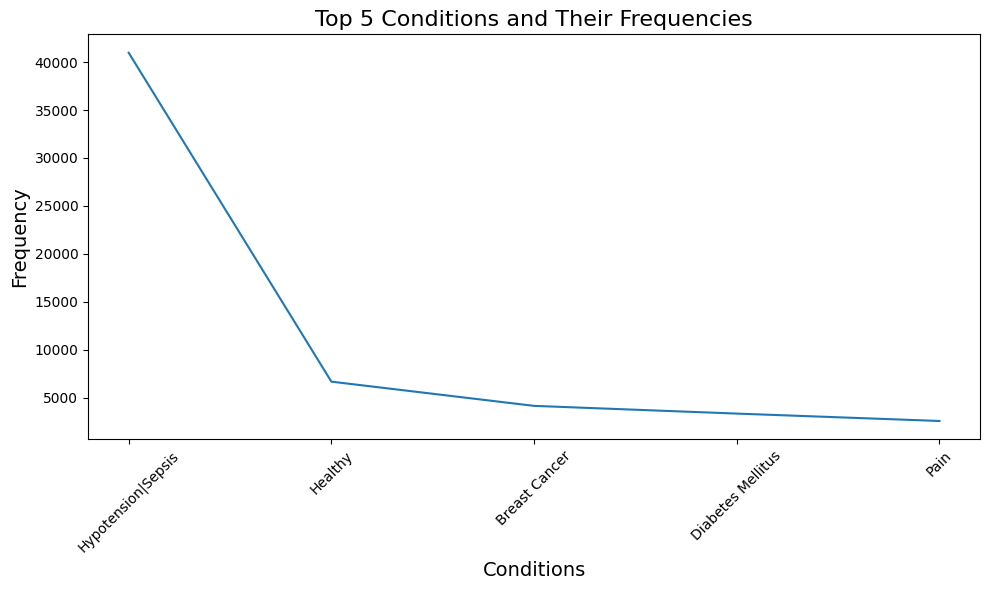

In [0]:
import pyspark.sql.functions as F
import matplotlib.pyplot as plt

# Group the DataFrame by the 'Conditions' column
# Count the number of rows in each group (i.e., the frequency of each condition)
# Order the resulting DataFrame by the 'count' column in descending order
# Limit the output to the first 5 rows (i.e., the top 5 most frequent conditions)
top_5_conditions_df = clinicaltrial_2023_df.groupBy('Conditions').count().orderBy("count", ascending=False).limit(5)

# Convert the DataFrame to a Pandas DataFrame
top_5_conditions_pdf = top_5_conditions_df.toPandas()

# Extract the condition names and frequencies
conditions = top_5_conditions_pdf['Conditions'].tolist()
frequencies = top_5_conditions_pdf['count'].tolist()

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(conditions, frequencies)
plt.xlabel('Conditions', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 5 Conditions and Their Frequencies', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Question No 4

In [0]:
# Import the col function from pyspark.sql.functions module
from pyspark.sql.functions import col

# Perform a left anti join between clinicaltrial_2023_df and pharma_df
# The join condition is clinicaltrial_2023_df["sponsor"] == pharma_df["Parent_Company"]
# This will exclude rows from clinicaltrial_2023_df where the "sponsor" value matches the "Parent_Company" value in pharma_df

non_pharma_sponsors_df = clinicaltrial_2023_df.join(pharma_df, clinicaltrial_2023_df ["sponsor"] == pharma_df ["Parent_Company"], "leftanti") \
    .filter(col("sponsor").isNotNull()) \
    .groupBy("sponsor").count().orderBy(col("count").desc()).take(10)

 # Iterate over the non_pharma_sponsors_df DataFrame
print("Top 10 not pharmaceutical sponsors:")
for row in non_pharma_sponsors_df:
    print(row)

Top 10 not pharmaceutical sponsors:
Row(sponsor='University Hospital', count=8363)
Row(sponsor='University of California', count=4100)
Row(sponsor='Assiut University', count=2913)
Row(sponsor='Cairo University', count=2570)
Row(sponsor='Assistance Publique - Hôpitaux de Paris', count=2539)
Row(sponsor='Mayo Clinic', count=2328)
Row(sponsor='National Cancer Institute (NCI)', count=2325)
Row(sponsor='M.D. Anderson Cancer Center', count=2181)
Row(sponsor='Massachusetts General Hospital', count=1979)
Row(sponsor='National Taiwan University Hospital', count=1829)


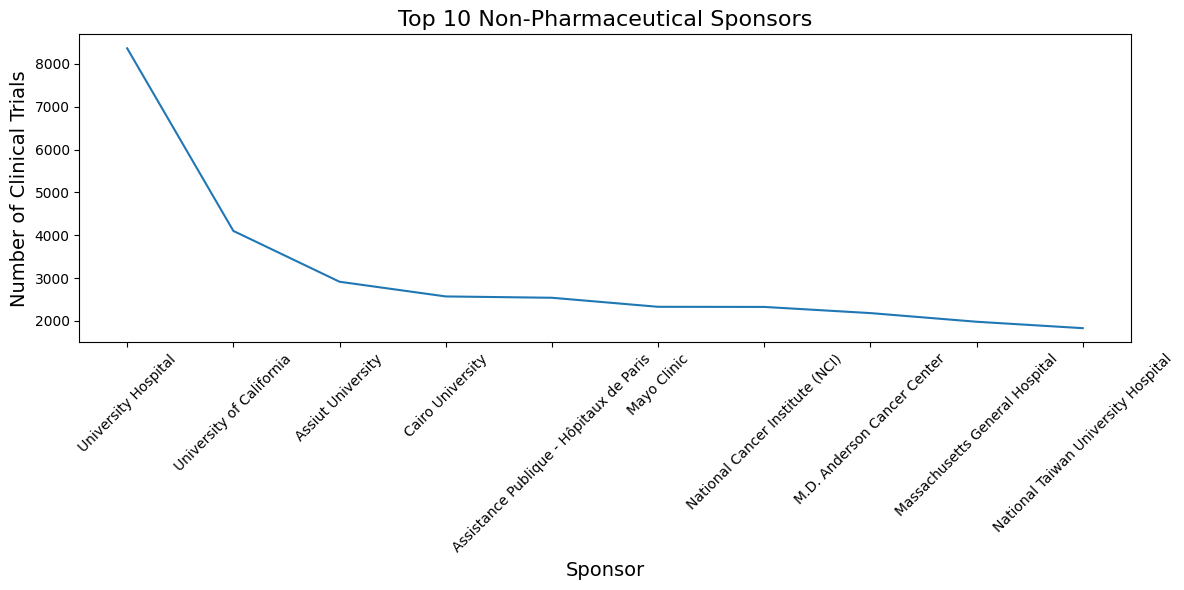

In [0]:
# Import the necessary libraries
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import pandas as pd

# Perform the operations to get the top 10 non-pharmaceutical sponsors
non_pharma_sponsors_df = clinicaltrial_2023_df.join(pharma_df, clinicaltrial_2023_df["sponsor"] == pharma_df["Parent_Company"], "leftanti") \
    .filter(col("sponsor").isNotNull()) \
    .groupBy("sponsor").count().orderBy(col("count").desc()).take(10)

# Convert the list of tuples to a Pandas DataFrame
non_pharma_sponsors_pdf = pd.DataFrame(non_pharma_sponsors_df, columns=['sponsor', 'count'])

# Extract the sponsor names and counts
sponsors = non_pharma_sponsors_pdf['sponsor'].tolist()
counts = non_pharma_sponsors_pdf['count'].tolist()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.plot(sponsors, counts)
plt.xlabel('Sponsor', fontsize=14)
plt.ylabel('Number of Clinical Trials', fontsize=14)
plt.title('Top 10 Non-Pharmaceutical Sponsors', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Question No 5

In [0]:
# Import the month function from the pyspark.sql.functions module
from pyspark.sql.functions import month

# Filter the clinicaltrial_2023_df DataFrame to include only rows where the 'Completion' column starts with '2023'
completed_studies_df = clinicaltrial_2023_df.filter(clinicaltrial_2023_df['Completion'].startswith('2023')) \
    .withColumn ('Month',month('Completion'))
    # Add a new column 'Month' to the filtered DataFrame by applying the month function to the 'Completion' column

# Group the completed_studies_df DataFrame by the 'Month' column
# Count the number of rows in each group (i.e., the number of completed studies for each month)
# Order the resulting DataFrame by the 'Month' column in ascending order
completed_studies_count_df = completed_studies_df.groupBy('Month').count().orderBy('Month')

# Filter the completed_studies_count_df DataFrame to include only rows where the 'Month' column is not null
filtered_completed_studies_count_df = completed_studies_count_df.filter(completed_studies_count_df['Month'].isNotNull())

# Display the contents of the filtered_completed_studies_count_df DataFrame
filtered_completed_studies_count_df.show()

+-----+-----+
|Month|count|
+-----+-----+
|    1| 1279|
|    2| 1034|
|    3| 1454|
|    4| 1159|
|    5| 1274|
|    6| 1773|
|    7| 1365|
|    8| 1337|
|    9| 1420|
|   10| 1306|
|   11| 1140|
|   12| 4628|
+-----+-----+



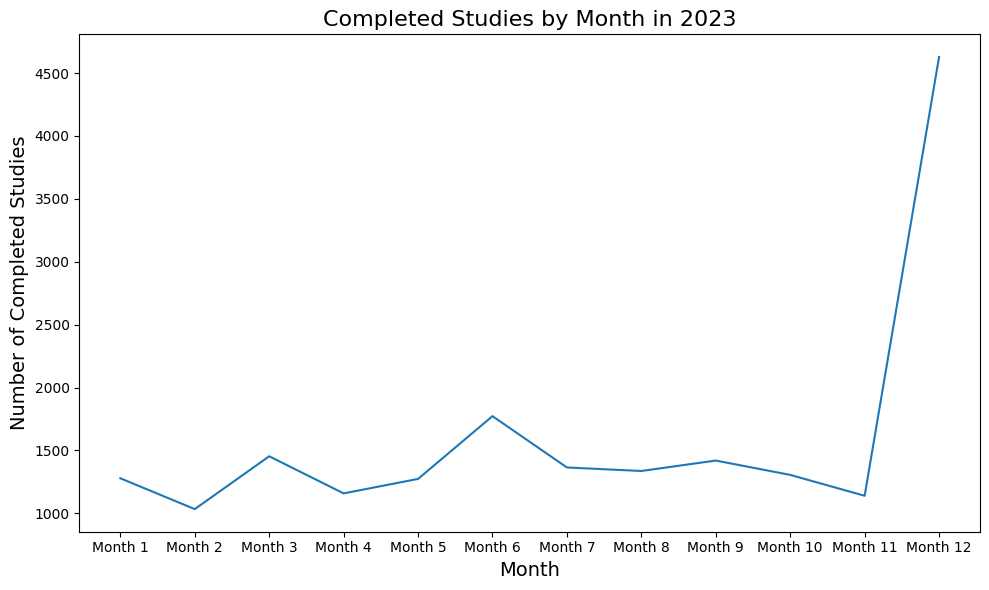

In [0]:
# Import the necessary libraries
from pyspark.sql.functions import month
import matplotlib.pyplot as plt

# Filter the clinicaltrial_2023_df DataFrame to include only rows where the 'Completion' column starts with '2023'
completed_studies_df = clinicaltrial_2023_df.filter(clinicaltrial_2023_df['Completion'].startswith('2023')) \
    .withColumn('Month', month('Completion'))

# Group the completed_studies_df DataFrame by the 'Month' column
# Count the number of rows in each group (i.e., the number of completed studies for each month)
# Order the resulting DataFrame by the 'Month' column in ascending order
completed_studies_count_df = completed_studies_df.groupBy('Month').count().orderBy('Month')

# Filter the completed_studies_count_df DataFrame to include only rows where the 'Month' column is not null
filtered_completed_studies_count_df = completed_studies_count_df.filter(completed_studies_count_df['Month'].isNotNull())

# Convert the DataFrame to a Pandas DataFrame
completed_studies_pdf = filtered_completed_studies_count_df.toPandas()

# Extract the month numbers and counts
months = completed_studies_pdf['Month'].tolist()
counts = completed_studies_pdf['count'].tolist()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.plot(months, counts)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Completed Studies', fontsize=14)
plt.title('Completed Studies by Month in 2023', fontsize=16)
plt.xticks(months, [f'Month {m}' for m in months])
plt.tight_layout()
plt.show()
